<a href="https://colab.research.google.com/github/xl122/hello_world/blob/master/hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TensorFlow is an open source machine learning library
#!pip install tensorflow as tf==2.0
import tensorflow as tensorflow
#Numpy is a math library
import numpy as np
#Matplotlib is a graphing library
import matplotlib.pyplot as plt
#math is Python's math library
import math

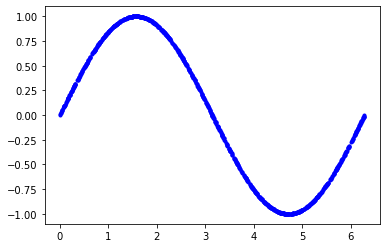

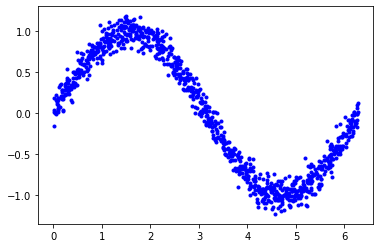

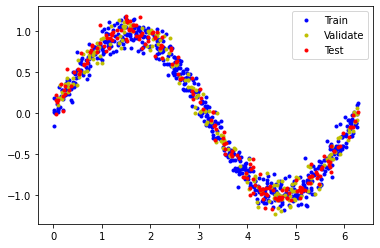

In [46]:
SAMPLES = 1000
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
x_values = np.random.uniform(low=0,high=2*math.pi,size=SAMPLES)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values,y_values,'b.')
plt.show()

y_values +=0.1 *np.random.randn(*y_values.shape)
plt.plot(x_values,y_values,'b.')
plt.show()

TRAIN_SPLIT = int(0.6*SAMPLES)
TEST_SPLIT = int(0.2 *SAMPLES +TRAIN_SPLIT)

x_train,x_validate,x_test = np.split(x_values,[TRAIN_SPLIT,TEST_SPLIT])
y_train,y_validate,y_test = np.split(y_values,[TRAIN_SPLIT,TEST_SPLIT])
assert(x_train.size+x_validate.size+x_test.size)==SAMPLES

plt.plot(x_train,y_train,'b.',label="Train")
plt.plot(x_validate,y_validate,'y.',label="Validate")
plt.plot(x_test,y_test,"r.",label="Test")
plt.legend()
plt.show()


In [20]:
from tensorflow.keras import layers
model_1 =tensorflow.keras.Sequential()
model_1.add(layers.Dense(16,activation='relu',input_shape=(1,)))
model_1.add(layers.Dense(1))
model_1.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model_1.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                32        
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1 =model_1.fit(x_train,y_train,epochs=1000,batch_size=16,validation_data=(x_validate,y_validate))


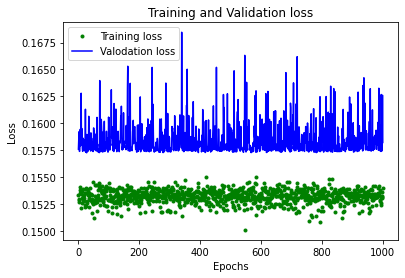

In [27]:
loss =history_1.history['loss']
val_loss =history_1.history['val_loss']
epochs =range(1,len(loss)+1)

plt.plot(epochs,loss,'g.',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


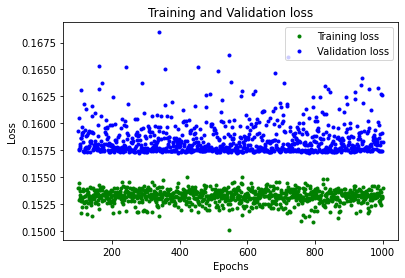

In [32]:
SKIP =100
plt.plot(epochs[SKIP:],loss[SKIP:],'g.',label='Training loss')
plt.plot(epochs[SKIP:],val_loss[SKIP:],'b.',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

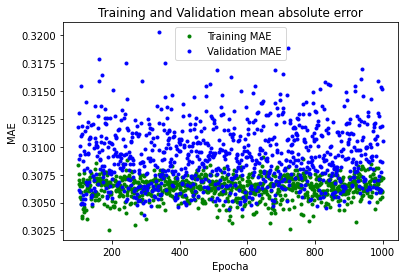

In [34]:
mae =history_1.history['mae']
val_mae=history_1.history['val_mae']
plt.plot(epochs[SKIP:],mae[SKIP:],'g.',label='Training MAE')
plt.plot(epochs[SKIP:],val_mae[SKIP:],'b.',label='Validation MAE')
plt.title('Training and Validation mean absolute error')
plt.xlabel('Epocha')
plt.ylabel('MAE')
plt.legend()
plt.show()

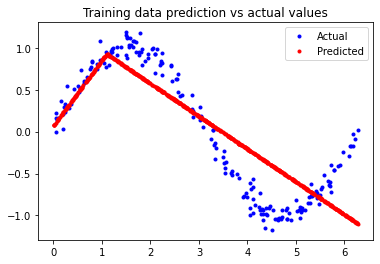

In [36]:
predictions =model_1.predict(x_train)
plt.clf()
plt.title('Training data prediction vs actual values')
plt.plot(x_test,y_test,'b.',label='Actual')
plt.plot(x_train,predictions,'r.',label='Predicted')
plt.legend()
plt.show()


# **Model2**

In [39]:
model_2 =tensorflow.keras.Sequential()
model_2.add(layers.Dense(16,activation='relu',input_shape=(1,)))
model_2.add(layers.Dense(16,activation='relu'))
model_2.add(layers.Dense(1))
model_2.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                32        
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [61]:
history_2 =model_2.fit(x_train,y_train,epochs=600,batch_size=1,validation_data=(x_validate,y_validate))

Epoch 1/600
600/600 [==============================] - 1s 2ms/step - loss: 0.0138 - mae: 0.0921 - val_loss: 0.0145 - val_mae: 0.0969
Epoch 2/600
600/600 [==============================] - 1s 2ms/step - loss: 0.0137 - mae: 0.0939 - val_loss: 0.0190 - val_mae: 0.1082
Epoch 3/600
600/600 [==============================] - 1s 2ms/step - loss: 0.0132 - mae: 0.0912 - val_loss: 0.0163 - val_mae: 0.1019
Epoch 4/600
600/600 [==============================] - 1s 2ms/step - loss: 0.0132 - mae: 0.0918 - val_loss: 0.0115 - val_mae: 0.0867
Epoch 5/600
600/600 [==============================] - 1s 2ms/step - loss: 0.0139 - mae: 0.0958 - val_loss: 0.0162 - val_mae: 0.1031
Epoch 6/600
600/600 [==============================] - 1s 2ms/step - loss: 0.0132 - mae: 0.0915 - val_loss: 0.0114 - val_mae: 0.0846
Epoch 7/600
600/600 [==============================] - 1s 2ms/step - loss: 0.0137 - mae: 0.0937 - val_loss: 0.0123 - val_mae: 0.0883
Epoch 8/600
600/600 [==============================] - 1s 2ms/step - 

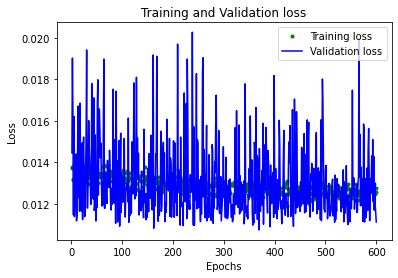

In [62]:
loss =history_2.history['loss']
val_loss =history_2.history['val_loss']
epochs =range(1,len(loss)+1)
plt.plot(epochs,loss,'g.',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


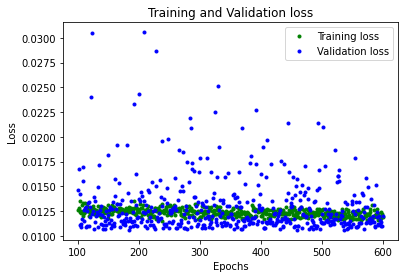

In [50]:
SKIP =100
plt.plot(epochs[SKIP:],loss[SKIP:],'g.',label='Training loss')
plt.plot(epochs[SKIP:],val_loss[SKIP:],'b.',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

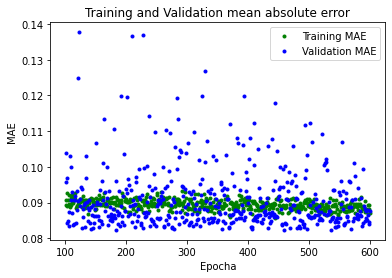

In [51]:
plt.clf()
mae =history_2.history['mae']
val_mae=history_2.history['val_mae']
plt.plot(epochs[SKIP:],mae[SKIP:],'g.',label='Training MAE')
plt.plot(epochs[SKIP:],val_mae[SKIP:],'b.',label='Validation MAE')
plt.title('Training and Validation mean absolute error')
plt.xlabel('Epocha')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step - loss: 0.0092 - mae: 0.0759


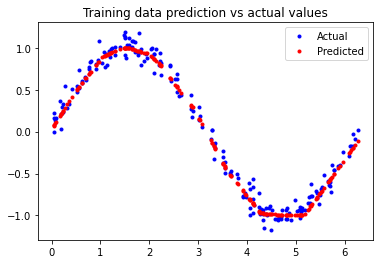

In [63]:
loss =model_2.evaluate(x_test,y_test)
predictions =model_2.predict(x_test)
plt.clf()
plt.title('Training data prediction vs actual values')
plt.plot(x_test,y_test,'b.',label='Actual')
plt.plot(x_test,predictions,'r.',label='Predicted')
plt.legend()
plt.show()

In [64]:
loss =model_2.evaluate(x_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0092 - mae: 0.0759


# **为TensorFlow Lite转换模型**

In [69]:
convert =tensorflow.lite.TFLiteConverter.from_keras_model(model_2) 
tflite_model =convert.convert() 
open("sine_model.tflite","wb").write(tflite_model) 
converter=tensorflow.lite.TFLiteConverter.from_keras_model(model_2) 
converter.optimizations=[tensorflow.lite.Optimize.DEFAULT]

def representative_dataset_generator(): 
  for value in x_test: 
    yield [np.array(value,dtype=np.float32,ndmin=2)] 
converter.representative_dataset=representative_dataset_generator 
tflite_model=converter.convert() 
open("sine_model_quantized.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpjj5ug4qn/assets


INFO:tensorflow:Assets written to: /tmp/tmpjj5ug4qn/assets


INFO:tensorflow:Assets written to: /tmp/tmpq6_hgn2b/assets


INFO:tensorflow:Assets written to: /tmp/tmpq6_hgn2b/assets


2768

ValueError: ignored

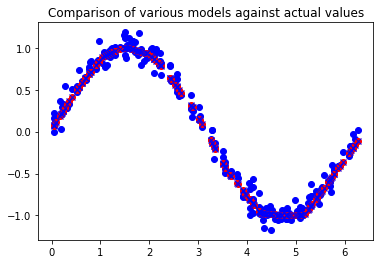

In [76]:
sine_model=tensorflow.lite.Interpreter('sine_model.tflite')
sine_model_quantized=tensorflow.lite.Interpreter('sine_model_quantized.tflite')

sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

sine_model_input_index=sine_model.get_input_details()[0]["index"]
sine_model_output_index=sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index=sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index=sine_model_quantized.get_output_details()[0]["index"]

sine_model_predictions=[]
sine_model_quantized_predictions=[]

for x_value in x_test:
  x_value_tensor=tensorflow.convert_to_tensor([[x_value]],dtype=np.float32)
  sine_model.set_tensor(sine_model_input_index,x_value_tensor)
  sine_model.invoke()
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])
sine_model_quantized.set_tensor(sine_model_quantized_input_index,x_value_tensor)
sine_model_quantized.invoke()
sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test,y_test,'bo',label='Actual')
plt.plot(x_test,predictions,'ro',label='Original predictions')
plt.plot(x_test,sine_model_predictions,'bx',label='Lite predictions')
plt.plot(x_test,sine_model_quantized_predictions,'gx',label='Lite quantized predictions')
plt.legend()
plt.show()


In [78]:
import os
basic_model_size=os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" %basic_model_size)
quantized_model_size=os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference=basic_model_size-quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 2960 bytes
Quantized model is 2768 bytes
Difference is 192 bytes


In [79]:
!apt-get -qq install xxd
!xxd -i sine_model_quantized.tflite.tflite > sine_model_quantized.cc
!cat sine_model_quantized.cc

Selecting previously unselected package xxd.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.7_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.7) ...
Setting up xxd (2:8.0.1453-1ubuntu1.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
xxd: sine_model_quantized.tflite.tflite: No such file or directory
